# Neural Network by Hand
3 layer feedfoward neural network implemented using:

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Example dataset:

In [2]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1]
])

Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

for x, y in zip(X, Y):
    print(x, y)

[0 0 1] [0]
[1 1 1] [1]
[1 0 1] [1]
[0 1 1] [0]


Hyper-parameters:

In [3]:
num_epochs = 100000

Weights:

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative(x):
    return x * (1 - x)

In [5]:
# weights in range[-1, 1]
syn2 = np.random.random((3, 4)) * 2 - 1
syn3 = np.random.random((4, 1)) * 2 - 1

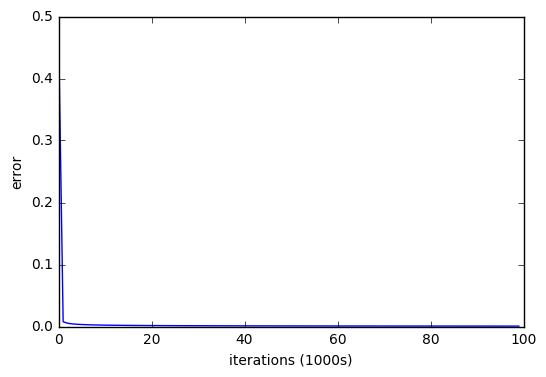

In [6]:
errs = np.zeros(int(num_epochs / 1000))

for j in range(num_epochs):
    # feed-forward from input to output
    layer_1 = X
    layer_2 = sigmoid(np.dot(layer_1, syn2))
    layer_3 = sigmoid(np.dot(layer_2, syn3))
    
    # computer in third layer
    layer_3_error = y - layer_3
    layer_3_delta = layer_3_error * derivative(layer_3)
    
    # computer output in hidden layer
    layer_2_error = layer_3_delta.dot(syn3.T)
    layer_2_delta = layer_2_error * derivative(layer_2)
    
    syn3 += layer_2.T.dot(layer_3_delta)
    syn2 += layer_1.T.dot(layer_2_delta)
    
    
    if (j % 1000) == 0:
        err = np.mean(np.abs(layer_3_error))
        errs[int(j / 1000)] = err
        
plt.plot(range(int(num_epochs / 1000)), errs)
plt.ylabel("error")
plt.xlabel("iterations (1000s)")